# Median age evolution for various countries

In [17]:
import urllib.request
import os
from pathlib import Path
from bs4 import BeautifulSoup
import pandas

data_folder = "../data"
    
def download():
    urls = (
        'https://www.statista.com/statistics/275555/median-age-of-the-population-in-mexico/',
        'https://www.statista.com/statistics/275391/median-age-of-the-population-in-france/',
        'https://www.statista.com/statistics/254361/average-age-of-the-population-in-brazil/',
        'https://www.statista.com/statistics/241494/median-age-of-the-us-population/',
        'https://www.statista.com/statistics/624303/average-age-of-the-population-in-germany/',
        'https://www.statista.com/statistics/261339/life-expectancy-at-birth-in-switzerland/',
        'https://www.statista.com/statistics/408007/average-age-of-the-population-in-algeria/',
        'https://www.statista.com/statistics/524614/average-age-of-the-population-in-tunisia/',
        'https://www.statista.com/statistics/326829/average-age-of-the-population-in-iraq/',
        'https://www.statista.com/statistics/326576/average-age-of-the-population-in-syria/',
        'https://www.statista.com/statistics/382229/average-age-of-the-population-in-nigeria/',
        'https://www.statista.com/statistics/255480/median-age-of-the-population-in-turkey/',
        'https://fr.statista.com/statistiques/785233/age-median-de-la-population-iran/',
        'https://www.statista.com/statistics/368964/average-age-of-the-population-in-colombia/',
        'https://www.statista.com/statistics/370768/average-age-of-the-population-in-venezuela/',
        )

    Path(data_folder).mkdir(parents=True, exist_ok=True)
    for url in urls:
        segments = [field for field in url.split('/') if field]
        name = segments[-1].split('-')[-1]
        filename = f'{data_folder}{os.path.sep}{name}.html'
        if os.path.exists(filename):
            continue
            
        response = urllib.request.urlopen(url)
        data = response.read()
        with open(filename, 'wb') as output:
            output.write(data)

def parse(filename):
    soup = BeautifulSoup(open(filename), "html.parser")
    table = soup.find("table", {"id": "statTableHTML"})

    table_body = table.find("tbody")
    rows = table_body.find_all("tr")
    data = list()
    country = filename.split(os.path.sep)[-1].split('.')[0]
    for row in rows:
        cols = row.find_all("td")
        cols = [ele.text.strip() for ele in cols]
        if cols[0].endswith("*"):
            year = int(cols[0][:-1])
            estimated = True
        else:
            year = int(cols[0])
            estimated = False
            
        median_age = float(cols[1].replace(',', '.'))
        data.append({"country": country, "year": year, "estimated": estimated, "median_age": median_age})

    return data


In [18]:
download()

In [19]:
rows = list()
for filename in os.listdir(data_folder):
    if not filename.endswith(".html"):
        continue

    rows += parse(f"{data_folder}{os.path.sep}{filename}")
    
data = pandas.DataFrame(rows)

In [20]:
data

,country,year,estimated,median_age
0,mexico,2100,True,52.1
1,mexico,2095,True,51.5
2,mexico,2090,True,50.7
3,mexico,2085,True,49.9
4,mexico,2080,True,49.0
...,...,...,...,...
556,venezuela,1970,False,15.8
557,venezuela,1965,False,15.4
558,venezuela,1960,False,15.5
559,venezuela,1955,False,16.0


<AxesSubplot:xlabel='year'>

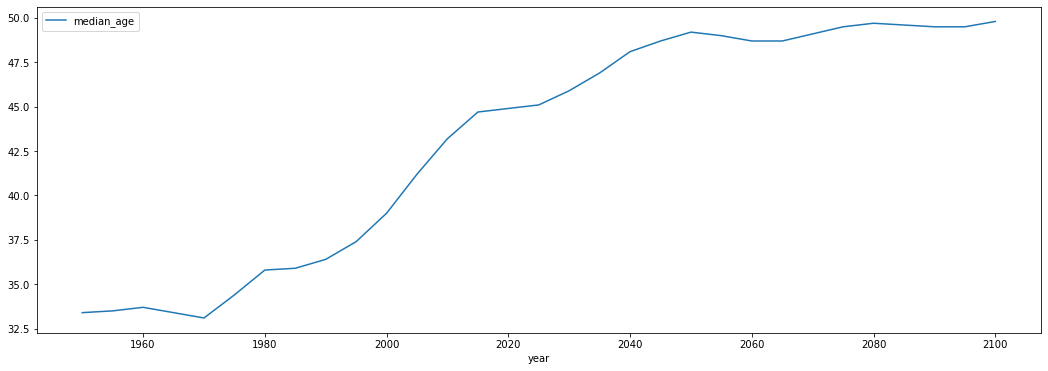

In [23]:
import matplotlib
data[data['country'] == 'germany'][['year', 'median_age']].set_index('year').sort_index().plot(figsize=(18,6))